With feature 1 and k = 1 accuracy score is 0.0
With feature 1 and k = 3 accuracy score is 0.0
With feature 1 and k = 5 accuracy score is 1.0
With feature 1 and k = 7 accuracy score is 1.0
With feature 1 and k = 9 accuracy score is 1.0
With feature 1 and k = 11 accuracy score is 1.0
---------------------------------------------------------------------------------------
With feature 2 and k = 1 accuracy score is 1.0
With feature 2 and k = 3 accuracy score is 1.0
With feature 2 and k = 5 accuracy score is 1.0
With feature 2 and k = 7 accuracy score is 0.0
With feature 2 and k = 9 accuracy score is 0.0
With feature 2 and k = 11 accuracy score is 1.0
---------------------------------------------------------------------------------------
With feature 3 and k = 1 accuracy score is 1.0
With feature 3 and k = 3 accuracy score is 1.0
With feature 3 and k = 5 accuracy score is 1.0
With feature 3 and k = 7 accuracy score is 1.0
With feature 3 and k = 9 accuracy score is 1.0
With feature 3 and k = 

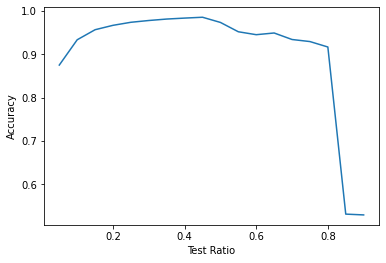


Highest Accuracy is With k = 11 and test_ratio = 0.45


In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the iris dataset from scikit
iris = load_iris()

# Splitting dataset as X and y
X = iris.data
y = iris.target

# Splitting all features individually
X_f1 = X[:,[0]]
X_f2 = X[:,[1]]
X_f3 = X[:,[2]]
X_f4 = X[:,[3]]


# First part of the homework. 
# Function to split data into test and training, fitting the model, and returning accuracy score.
def fitAndPredictKNN(X, y, n, test_ratio):

  # Splitting training and test with scikit
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_ratio, random_state=4)

  # Declaring k value for KNN algorithm
  knn = KNeighborsClassifier(n_neighbors = n)

  # Fitting the KNN model with training data
  knn.fit(X_train, y_train)

  # Using model to predict y on X_test data
  y_pred = knn.predict(X_test)

  # Comparing our y predictions to actual values(y_test) and getting a accuracy score
  score = metrics.accuracy_score(y_test, y_pred)
  return score


# Function for easily testing different k values with all features and individual features as asked in question 1
def test_different_k(test_ratio):
  
  # Individual features in a dictionary to easily iterate with for loop
  dict = {1:X_f1,
          2:X_f2,
          3:X_f3,
          4:X_f4}

  # Testing individual features with nested for loop
  for i in range (1,5):
    for j in range(1,12,2):
        score = fitAndPredictKNN(dict[i],y,j,test_ratio)
        print("With feature " + str(i) + " and k = " + str(j) + " accuracy score is " + str(score))
    print("---------------------------------------------------------------------------------------")

  # Testing with all features
  for j in range(1,12,2):
    score = fitAndPredictKNN(X,y,j,test_ratio)
    print("With all features and k = " + str(j) + " accuracy score is " + str(score))

# Using the test function to observe best k value
test_different_k(1)

print("\nBest features are petal length(feature 3) and petal width(feature 4). This can be observed with different test ratio values than 1")

# Print two lines for better readability in console
print("\n\n")

# Testing different test ratios on best performing k value as asked in question 2
def test_different_test_ratio():
  plot_x = []
  plot_y = []

  for i in np.arange(0.05,0.95,0.05):
    score = fitAndPredictKNN(X,y,11,i)
    print("Accuracy score is " + str(score) + " with test ratio = "+str(i))
    plot_x.append(i)
    plot_y.append(score)

  plt.plot(plot_x,plot_y)
  plt.xlabel("Test Ratio")
  plt.ylabel("Accuracy")
  plt.show()

test_different_test_ratio()



# My conclusion on best values for KNN algorithm with iris dataset
print("\n""Highest Accuracy is With k = 11 and test_ratio = 0.45")